This is Jeremy Kozlowski's senior project, advised by Dr. Franz Kurfess. It explores machine learning applications for stellar classification. The following tutorial trains the models as well as makes predictions. Prerequisites: Python fundamentals

# Training

In this section, we will train various models on the data set.

We will first import all necessary libraries and read in the dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import tensorflow as tf
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
df_stellar = pd.read_csv('/content/star_classification.csv')
df_stellar

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


Now we will build each of the 6 models. Each model consists of a training stage, validation stage, and testing stage. Depending on if cross validation was used or if a separate validation set is even needed, there may not be validation sets for each model. At the end, each model is saved so that it can be used for predictions later on

## kNN

In [ ]:
X = df_stellar[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y = df_stellar['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
ct = make_column_transformer(
      (StandardScaler(), ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']),
      remainder="drop"  # all other columns in X will be dropped.
  )

kNNPipeline = make_pipeline(
    ct,
    KNeighborsClassifier(n_neighbors=3)
)

grid_search = GridSearchCV(kNNPipeline,
                           param_grid={
                               "kneighborsclassifier__n_neighbors": range(1, 25)
                           },
                           scoring="f1_macro",
                           cv=10)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['alpha',
                                                                          'delta',
                                                                          'u',
                                                                          'g',
                                                                          'r',
                                                                          'i',
                                                                          'z',
                                                                          'redshift'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 25)},
             scoring='f1_macro')

In [ ]:
df_cv_results_ = pd.DataFrame(grid_search.cv_results_)

pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score").head(10) # rank test scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.285353,0.077853,0.850813,0.153756,3,{'kneighborsclassifier__n_neighbors': 3},0.937655,0.935205,0.935409,0.934418,0.935038,0.930470,0.933817,0.935897,0.942585,0.928085,0.934858,0.003681,1
4,0.308711,0.087931,0.950163,0.168249,5,{'kneighborsclassifier__n_neighbors': 5},0.935547,0.935501,0.934341,0.935294,0.931230,0.928228,0.932229,0.936399,0.940090,0.928081,0.933694,0.003571,2
6,0.260095,0.052363,0.901578,0.131462,7,{'kneighborsclassifier__n_neighbors': 7},0.933357,0.933288,0.931347,0.930944,0.932132,0.928589,0.931470,0.935458,0.939540,0.926796,0.932292,0.003347,3
8,0.292549,0.079086,1.109583,0.485925,9,{'kneighborsclassifier__n_neighbors': 9},0.931391,0.931197,0.929663,0.928398,0.929468,0.926621,0.930464,0.934329,0.936000,0.926759,0.930429,0.002853,4
10,0.294425,0.079299,1.074395,0.185889,11,{'kneighborsclassifier__n_neighbors': 11},0.930180,0.929162,0.926201,0.926606,0.927974,0.923903,0.930086,0.931068,0.935860,0.925315,0.928635,0.003268,5
5,0.274192,0.073779,0.931728,0.218090,6,{'kneighborsclassifier__n_neighbors': 6},0.928459,0.931091,0.926052,0.928522,0.926516,0.924683,0.927296,0.931337,0.936362,0.922181,0.928250,0.003766,6
7,0.295318,0.083727,1.012596,0.216442,8,{'kneighborsclassifier__n_neighbors': 8},0.927016,0.928059,0.927617,0.926959,0.928197,0.924786,0.928542,0.930782,0.932746,0.923559,0.927826,0.002501,7
3,0.310429,0.087622,0.903333,0.178533,4,{'kneighborsclassifier__n_neighbors': 4},0.925976,0.929221,0.927454,0.928023,0.927677,0.921647,0.931163,0.928588,0.936241,0.921448,0.927744,0.004085,8
12,0.276110,0.069708,1.054197,0.238963,13,{'kneighborsclassifier__n_neighbors': 13},0.928634,0.928248,0.925043,0.924723,0.927390,0.920300,0.929020,0.928251,0.933882,0.924645,0.927013,0.003418,9
9,0.294373,0.083967,1.041036,0.182396,10,{'kneighborsclassifier__n_neighbors': 10},0.927184,0.926635,0.923217,0.924063,0.925670,0.922952,0.929038,0.928590,0.932394,0.924393,0.926414,0.002835,10


<Axes: title={'center': 'kNN Models with Varying k'}, xlabel='param_kneighborsclassifier__n_neighbors', ylabel='mean_test_score'>

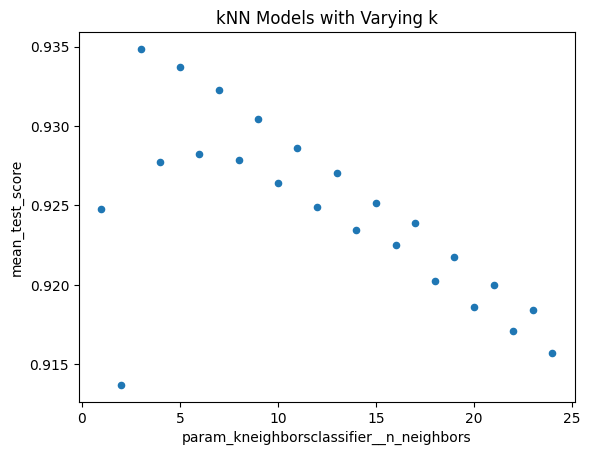

In [ ]:
df_cv_results_.plot.scatter(x = "param_kneighborsclassifier__n_neighbors", y = "mean_test_score", title = "kNN Models with Varying k")

This tells us that the optimal value for k is 3.

In [ ]:
kNNPipeline.fit(X=X_train, y=y_train)
y_pred = kNNPipeline.predict(X_test)

f1_score(y_pred, y_test, average='macro')

0.9370365382934186

Thus, kNN with a k value of 3 has an F1-score of 0.9370365382934186 on the test set.

In [ ]:
with open('kNN_model', 'wb') as pickle_file:
        pickle.dump(kNNPipeline, pickle_file)

# Neural Network

In [ ]:
labelEncoder = LabelEncoder()
df_stellar['class'] = labelEncoder.fit_transform(df_stellar['class']) #Galaxy = 0, qso = 1, star = 2

X = df_stellar[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y = df_stellar['class'].values

scaler = StandardScaler()
X = scaler.fit_transform(X.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    )
history = model.fit(X_train, y_train, epochs=100, batch_size=500)

Epoch 1/100
120/120 [==============================] - 6s 6ms/step - loss: 0.9193 - accuracy: 0.7185 - precision: 0.7208 - recall: 0.2539
Epoch 2/100
120/120 [==============================] - 1s 5ms/step - loss: 0.6141 - accuracy: 0.8274 - precision: 0.7445 - recall: 0.7343
Epoch 3/100
120/120 [==============================] - 1s 6ms/step - loss: 0.4192 - accuracy: 0.9028 - precision: 0.8578 - recall: 0.8491
Epoch 4/100
120/120 [==============================] - 1s 5ms/step - loss: 0.2867 - accuracy: 0.9386 - precision: 0.9091 - recall: 0.9064
Epoch 5/100
120/120 [==============================] - 0s 4ms/step - loss: 0.2274 - accuracy: 0.9546 - precision: 0.9329 - recall: 0.9307
Epoch 6/100
120/120 [==============================] - 1s 5ms/step - loss: 0.1956 - accuracy: 0.9624 - precision: 0.9444 - recall: 0.9427
Epoch 7/100
120/120 [==============================] - 1s 6ms/step - loss: 0.1750 - accuracy: 0.9671 - precision: 0.9511 - recall: 0.9501
Epoch 8/100
120/120 [=============

### Validation (precision, recall, f1)

In [ ]:
precision_score(y_val, np.argmax(model.predict(X_val), axis=1), average='macro'), recall_score(y_val, np.argmax(model.predict(X_val), axis=1),  average='macro'), f1_score(y_val, np.argmax(model.predict(X_val), axis=1), average='macro')

625/625 [==============================] - 1s 2ms/step


(0.967576377429645, 0.9620265756414376, 0.9645522545087685)

### Test (precision, recall, f1)

In [ ]:
precision_score(y_test, np.argmax(model.predict(X_test), axis=1), average='macro'), recall_score(y_test, np.argmax(model.predict(X_test), axis=1),  average='macro'), f1_score(y_test, np.argmax(model.predict(X_test), axis=1), average='macro')

625/625 [==============================] - 1s 1ms/step


(0.9687974111490641, 0.9629183992162913, 0.9656180464949284)

The neural network has a test macro F1 score of 0.9658185.

In [ ]:
with open('neuralNetwork_model', 'wb') as pickle_file:
        pickle.dump(model, pickle_file)

## Support Vector Machine

In [ ]:
labelEncoder = LabelEncoder()
df_stellar['class'] = labelEncoder.fit_transform(df_stellar['class']) #Galaxy = 0, qso = 1, star = 2

# df_stellar = df_stellar[:5000] #for demo only

X = df_stellar[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']] #features
y = df_stellar['class'].values #label

scaler = StandardScaler()
X = scaler.fit_transform(X.values)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
#same split, because there is uneven distribution of labels, we will stratify

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
linear = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

poly_pred = poly.predict(X_val)
rbf_pred = rbf.predict(X_val)
linear_pred = linear.predict(X_val)

accuracy_lin = linear.score(X_val, y_val)
accuracy_poly = poly.score(X_val, y_val)
accuracy_rbf = rbf.score(X_val, y_val)
# print("Accuracy Linear Kernel:", accuracy_lin)
# print("Accuracy Polynomial Kernel:", accuracy_poly)
# print("Accuracy Radial Basis Kernel:", accuracy_rbf)
accuracy_lin, accuracy_poly, accuracy_rbf

(0.9594, 0.8859, 0.94185)

### Validation

In [ ]:
print("Poly:")
print(precision_score(y_val, poly.predict(X_val), average='macro'), recall_score(y_val, poly.predict(X_val), average='macro'), f1_score(y_val, poly.predict(X_val), average='macro'))
print("RBF:")
print(precision_score(y_val, rbf.predict(X_val), average='macro'), recall_score(y_val, rbf.predict(X_val), average='macro'), f1_score(y_val, rbf.predict(X_val), average='macro'))
print("Lin:")
print(precision_score(y_val, linear.predict(X_val), average='macro'), recall_score(y_val, linear.predict(X_val), average='macro'), f1_score(y_val, linear.predict(X_val), average='macro'))


Poly:
0.9056954397558981 0.8433030328995686 0.8699756186643341
RBF:
0.9395474752320685 0.9340827304060219 0.935482333344381
Lin:
0.9572611774422087 0.949796131031624 0.952945341210888


### Test

In [ ]:
precision_score(y_test, linear.predict(X_test), average='macro'), recall_score(y_test, linear.predict(X_test), average='macro'), f1_score(y_test, linear.predict(X_test), average='macro')

(0.9600072412708468, 0.950116970691981, 0.9544209315552911)

In [ ]:
with open('SVM_model', 'wb') as pickle_file:
        pickle.dump(poly, pickle_file)

## Decision Tree

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END ......................max_depth=2;, score=0.934 total time=   0.2s
[CV 2/10] END ......................max_depth=2;, score=0.938 total time=   0.2s
[CV 3/10] END ......................max_depth=2;, score=0.936 total time=   0.2s
[CV 4/10] END ......................max_depth=2;, score=0.936 total time=   0.2s
[CV 5/10] END ......................max_depth=2;, score=0.934 total time=   0.2s
[CV 6/10] END ......................max_depth=2;, score=0.936 total time=   0.2s
[CV 7/10] END ......................max_depth=2;, score=0.933 total time=   0.2s
[CV 8/10] END ......................max_depth=2;, score=0.934 total time=   0.2s
[CV 9/10] END ......................max_depth=2;, score=0.939 total time=   0.2s
[CV 10/10] END .....................max_depth=2;, score=0.938 total time=   0.2s
[CV 1/10] END ......................max_depth=3;, score=0.937 total time=   0.3s
[CV 2/10] END ......................max_depth=

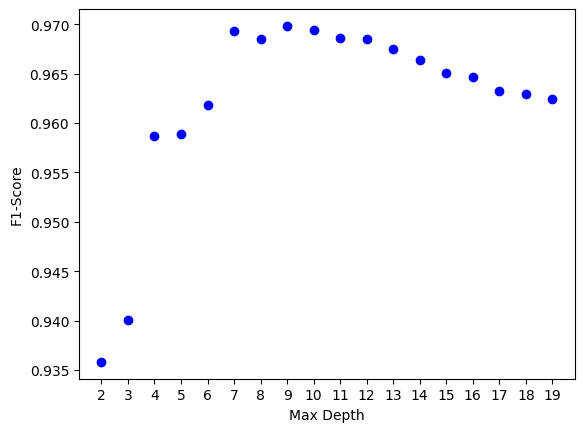

In [ ]:
labelEncoder = LabelEncoder()
df_stellar['class'] = labelEncoder.fit_transform(df_stellar['class']) #Galaxy = 0, qso = 1, star = 2

X = df_stellar[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y = df_stellar['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

gs_model = GridSearchCV(estimator=DecisionTreeClassifier(),
                        param_grid={'max_depth' : np.arange(2, 20, 1)},
                        verbose=3,
                        scoring='f1_macro',
                        cv=10)

gs_model.fit(X_train, y_train)

results = pd.DataFrame(gs_model.cv_results_)


plt.plot(results["param_max_depth"], results["mean_test_score"], 'bo')
plt.xlabel("Max Depth")
plt.ylabel('F1-Score')
plt.xticks(np.arange(2, 20, 1), np.arange(2, 20, 1))
plt.show()

### Test

In [ ]:
decisionTree = DecisionTreeClassifier(max_depth=9)
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
precision_score(y_test, decisionTree.predict(X_test), average='macro'), recall_score(y_test, decisionTree.predict(X_test), average='macro'), f1_score(y_test, decisionTree.predict(X_test), average='macro')

(0.9741612395252415, 0.9658520865387543, 0.9698622320261054)

In [ ]:
with open('decisionTree_model', 'wb') as pickle_file:
        pickle.dump(gs_model, pickle_file)

## Random Forest

In [ ]:
labelEncoder = LabelEncoder()
df_stellar['class'] = labelEncoder.fit_transform(df_stellar['class']) #Galaxy = 0, qso = 1, star = 2

X = df_stellar[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y = df_stellar['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

param_dist = {'n_estimators': randint(50,500),
          'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=91, max_depth=10)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=91)

### Testing

In [ ]:
precision_score(y_test, rf.predict(X_test), average='macro'), recall_score(y_test, rf.predict(X_test), average='macro'), f1_score(y_test, rf.predict(X_test), average='macro')


(0.9741117562821581, 0.9678215627936374, 0.9707790676076083)

In [ ]:
with open('randomForest_model', 'wb') as pickle_file:
        pickle.dump(gs_model, pickle_file)

## Naive Bayes

In [ ]:
X = df_stellar[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y = df_stellar['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Build a Gaussian Classifier
naiveBayesModel = GaussianNB()

# Model training
naiveBayesModel.fit(X_train, y_train)

# Predict Output
y_pred = naiveBayesModel.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="macro")

print("precision:", precision_score(y_pred, y_test, average='macro'))
print('recall:', recall_score(y_pred, y_test, average='macro'))
print("F1 Score:", f1)

with open('naiveBayes_model', 'wb') as pickle_file:
        pickle.dump(naiveBayesModel, pickle_file)


precision: 0.6278202956495128
recall: 0.8011903929524724
F1 Score: 0.5800599183088743


## Predictions

Now we will make predictions on some new data. While this data was already used to generate the model, this is just to demonstrate making predictions. The expected output for each of these three predictions is ["Galaxy", "Star", "QSO"].

In [ ]:
df_stellar = pd.read_csv('/content/star_classification.csv')
feat = df_stellar[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
scaler = StandardScaler()
scaler.fit(feat)

StandardScaler()

In [ ]:
df_new = pd.read_csv('new_data.csv')
X = df_new[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
X_scaled = scaler.transform(X)

In [ ]:
with open('kNN_model', 'rb') as pickle_file:
        kNNModel = pickle.load(pickle_file)

kNNModel.predict(X)

array(['GALAXY', 'STAR', 'QSO'], dtype=object)

In [ ]:
with open('neuralNetwork_model', 'rb') as pickle_file:
        neuralNetworkModel = pickle.load(pickle_file)

# neuralNetworkModel.predict(X)
output = []
predicted = np.argmax(neuralNetworkModel.predict(X_scaled), axis=1)

for pred in predicted:
  if pred == 0:
      output.append('GALAXY')
  elif pred == 1:
      output.append('QSO')
  else:
      output.append('STAR')

output

1/1 [==============================] - 0s 64ms/step


['GALAXY', 'STAR', 'QSO']

In [ ]:
with open('SVM_model', 'rb') as pickle_file:
        SVMModel = pickle.load(pickle_file)

SVMModel.predict(X_scaled)

output = []

for pred in predicted:
  if pred == 0:
      output.append('GALAXY')
  elif pred == 1:
      output.append('QSO')
  else:
      output.append('STAR')

output

['GALAXY', 'STAR', 'QSO']

In [ ]:
with open('decisionTree_model', 'rb') as pickle_file:
        decisionTreeModel = pickle.load(pickle_file)

decisionTreeModel.predict(X)

output = []

for pred in predicted:
  if pred == 0:
      output.append('GALAXY')
  elif pred == 1:
      output.append('QSO')
  else:
      output.append('STAR')

output

['GALAXY', 'STAR', 'QSO']

In [ ]:
with open('randomForest_model', 'rb') as pickle_file:
        rfModel = pickle.load(pickle_file)

rfModel.predict(X)

output = []

for pred in predicted:
  if pred == 0:
      output.append('GALAXY')
  elif pred == 1:
      output.append('QSO')
  else:
      output.append('STAR')

output

['GALAXY', 'STAR', 'QSO']

In [ ]:
with open('naiveBayes_model', 'rb') as pickle_file:
        naiveBayesModel = pickle.load(pickle_file)

naiveBayesModel.predict(X)

output = []

for pred in predicted:
  if pred == 0:
      output.append('GALAXY')
  elif pred == 1:
      output.append('QSO')
  else:
      output.append('STAR')

output

['GALAXY', 'STAR', 'QSO']